## 載入函式庫

In [1]:
### 載入函式庫 ###
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras_segmentation.models.unet import vgg_unet

Using TensorFlow backend.


## 超參數設定

In [2]:
### 超參數設定 ###
PIXEL_0_NAME = 'background' # 標記圖片中像素類別為0的名稱
PIXEL_1_NAME = 'ROI' # 標記圖片中像素類別為1的名稱
PIXEL_2_NAME = 'boundary' # 標記圖片中像素類別為2的名稱

PIXEL_CLASS_NUM = 3 # 標記圖片有背景、物件區域和物件邊界一共三種類別

IMG_SIZE = 128 # 圖片大小(長、寬)

TRAIN_IMAGE_PATH = "dataset\\images_train\\" # 訓練集原始照片的路徑
TRAIN_ANNOTATION_PATH = "dataset\\annotations_train\\" # 訓練集標記照片的路徑

TEST_IMAGE_PATH = "dataset\\images_test\\" # 測試集原始照片的路徑
TEST_ANNOTATION_PATH = "dataset\\annotations_test\\" # 測試集標記照片的路徑

# keras_segmentation模型參數相關
EPOCHS = 5 # 資料筆數不多，所以設少一點

## 建立模型 (VGG 16 + U-Net)

In [3]:
model = vgg_unet(n_classes = PIXEL_CLASS_NUM, input_height = IMG_SIZE, input_width = IMG_SIZE)
model.train(
    train_images = TRAIN_IMAGE_PATH,
    train_annotations = TRAIN_ANNOTATION_PATH,
    epochs = EPOCHS
)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 97.48it/s]

Verifying train dataset
Dataset verified! 
Starting Epoch  0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1
512/512 [==============================] - 277s 540ms/step - loss: 0.3041 - accuracy: 0.8921
Finished Epoch 0
Starting Epoch  1
Epoch 1/1
512/512 [==============================] - 273s 533ms/step - loss: 0.0622 - accuracy: 0.9810
Finished Epoch 1
Starting Epoch  2
Epoch 1/1
512/512 [==============================] - 274s 536ms/step - loss: 0.0316 - accuracy: 0.9915
Finished Epoch 2
Starting Epoch  3
Epoch 1/1
512/512 [==============================] - 271s 530ms/step - loss: 0.0445 - accuracy: 0.9910
Finished Epoch 3
Starting Epoch  4
Epoch 1/1
512/512 [==============================] - 271s 528ms/step - loss: 0.0266 - accuracy: 0.9942
Finished Epoch 4


## 查看訓練集、測試集圖片的標記結果

In [4]:
def show_pred_result(img_path, anno_path):
    plt.rcParams['font.sans-serif'] = ['simhei']
    plt.subplots(figsize=(15, 8))
    
    image_original = cv2.imread(img_path)

    image_anno_pred = model.predict_segmentation(inp = img_path)
    image_anno_pred = np.array(image_anno_pred, dtype = 'uint8')
    image_anno_pred = cv2.resize(image_anno_pred, (image_original.shape[1], image_original.shape[0]))
    plt.subplot(131)
    plt.title("模型標記結果", fontsize = 20)
    plt.imshow(image_anno_pred, cmap = 'gray')

    image_anno = cv2.imread(anno_path, cv2.IMREAD_GRAYSCALE)
    image_anno = cv2.resize(image_anno, (image_original.shape[1], image_original.shape[0]))
    plt.subplot(132)
    plt.title("原始標記", fontsize = 20)
    plt.imshow(image_anno, cmap = 'gray')

    b,g,r = cv2.split(image_original)  
    image_original = cv2.merge([r,g,b]) 
    #image_original = cv2.resize(image_original, image_anno_pred.shape)
    plt.subplot(133)
    plt.title("原始圖片", fontsize = 20)
    plt.imshow(image_original)


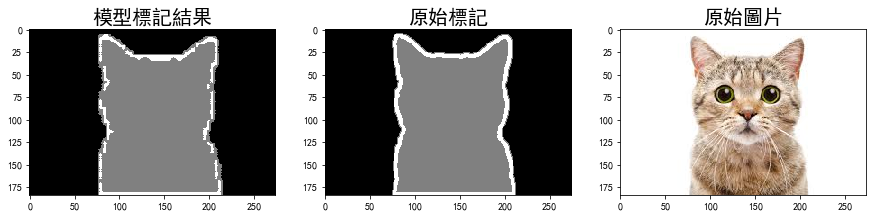

In [5]:
# 訓練集第一張照片
show_pred_result(os.path.join(TRAIN_IMAGE_PATH, "1.jpg"), os.path.join(TRAIN_ANNOTATION_PATH, "1.png"))

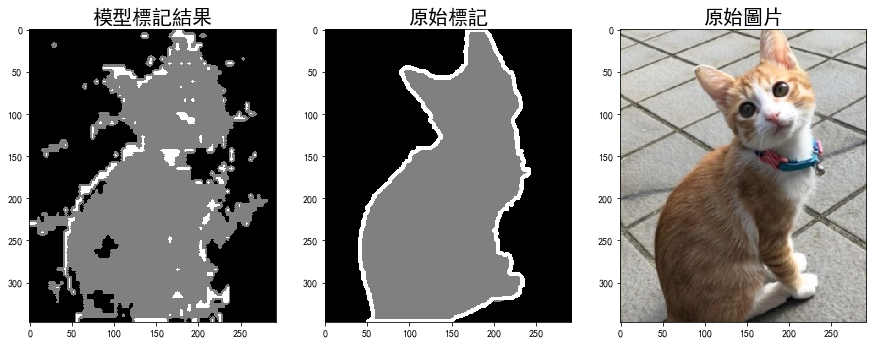

In [6]:
# 測試集第一張照片
show_pred_result(os.path.join(TEST_IMAGE_PATH, "1.jpg"), os.path.join(TEST_ANNOTATION_PATH, "1.png"))

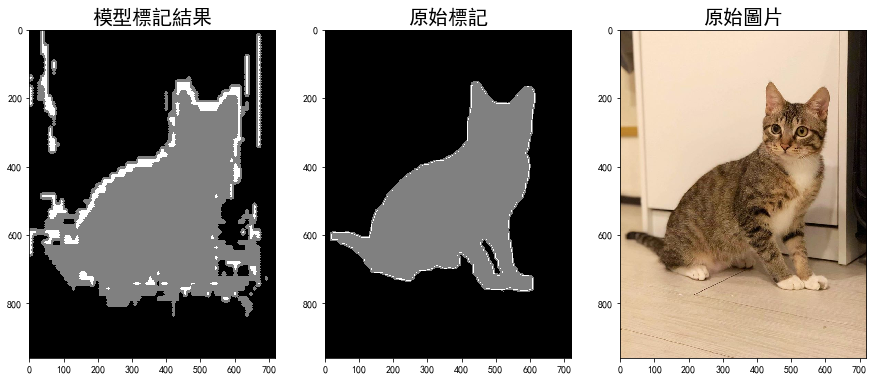

In [7]:
# 測試集第二張照片
show_pred_result(os.path.join(TEST_IMAGE_PATH, "2.jpg"), os.path.join(TEST_ANNOTATION_PATH, "2.png"))